In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string


In [41]:

# Завантаження даних
df = pd.read_csv('SMS_train.csv', encoding='ISO-8859-1')
df = df[['Label', 'Message_body']]

# Завантаження списку стоп-слів
stop_words = set(stopwords.words('english'))

df.columns

Index(['Label', 'Message_body'], dtype='object')

In [42]:
# Функція для попередньої обробки тексту
def preprocess_text(text):
    # Токенізація тексту
    word_tokens = word_tokenize(text)

    # Видалення пунктуації
    word_tokens = [word.translate(str.maketrans('', '', string.punctuation)) for word in word_tokens]

    # Видалення стоп-слів
    filtered_text = [word for word in word_tokens if word.casefold() not in stop_words]

    return ' '.join(filtered_text)


In [43]:
# Попередня обробка тексту
df['Message_body'] = df['Message_body'].apply(preprocess_text)
# Векторизація тексту
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X = vectorizer.fit_transform(df['Message_body'])


In [44]:
# Середнє значення TF-IDF для кожного слова
tfidf = X.mean(axis=0).A1

# Створення словника для WordCloud
wordcloud_dict = dict(zip(vectorizer.get_feature_names(), tfidf))

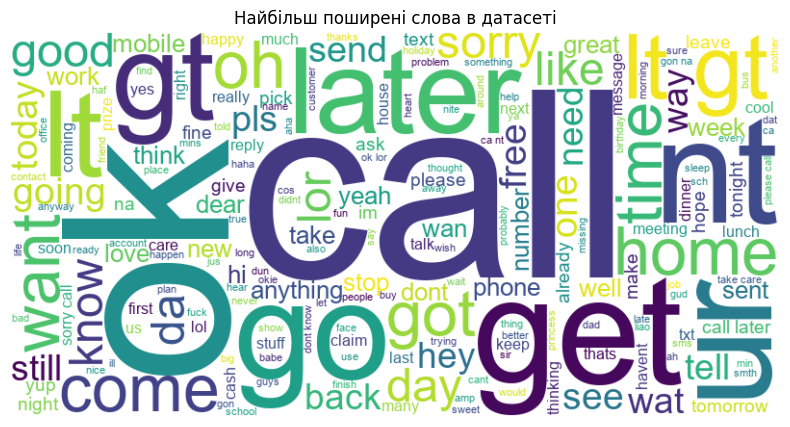

In [47]:
# Створення та відображення WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='arial.ttf').generate_from_frequencies(wordcloud_dict)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Найбільш поширені слова в датасеті')
plt.show()